In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import linalg

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal length','sepal width','petal length','petal width','target'])

Noramlize data

In [3]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

iris_data = iris.loc[:, features].values
iris_names = iris.loc[:,['target']].values

iris_standard = StandardScaler().fit_transform(iris_data)

#scaled data
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_data)


PCA 

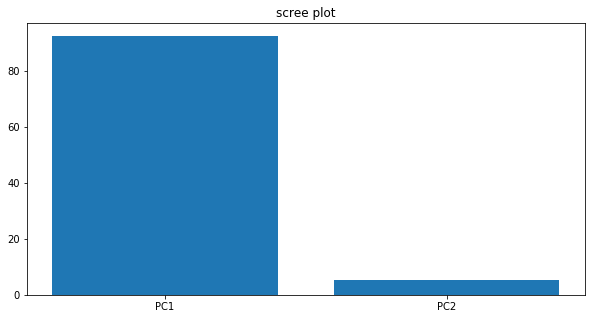

In [4]:
#components
principalComponents = pca.fit_transform(iris_data)

pca_vari = np.round(pca.explained_variance_ratio_ * 100, decimals = 4)
pca_labels = ['PC' + str(x) for x in range(1, len(pca_vari)+1)]

plt.figure(figsize=(10,5))
plt.bar(pca_labels, pca_vari)
plt.title('scree plot')
plt.show()


Text(0.5, 1.0, 'PCA of iris')

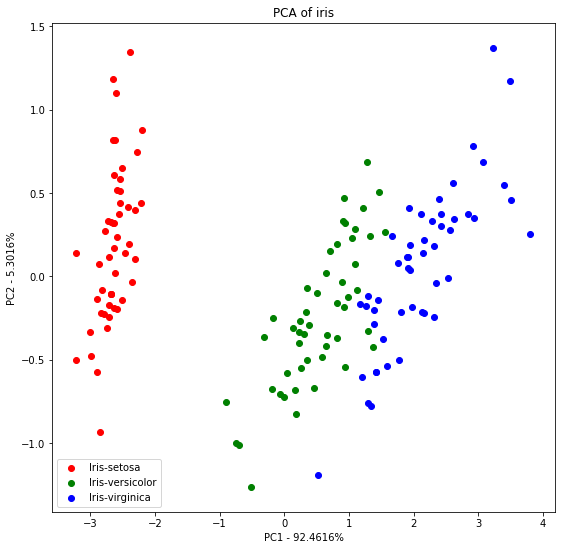

In [5]:
iris_pca = pd.DataFrame(data=iris_pca, columns=pca_labels)
iris_pca['target'] = iris_names

plt.figure(figsize=(9,9))

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color = ['r','g','b']

for target, color in zip(species,color):
    spec = iris_pca.target == target
    plt.scatter(iris_pca.loc[spec, 'PC1'], iris_pca.loc[spec, 'PC2'], c = color)

plt.legend(species)     
plt.xlabel('PC1 - ' + str(pca_vari[0]) + '%')
plt.ylabel('PC2 - ' + str(pca_vari[1]) + '%')
plt.title('PCA of iris')


**Nearest Neighbor Classification**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

iris_train, iris_test = train_test_split(iris_pca, test_size=0.5)

predictor = KNeighborsClassifier(n_neighbors=5)
predictor.fit(iris_train[['PC1','PC2']], iris_train['target'])

predictions = predictor.predict(iris_test[['PC1','PC2']])

print(accuracy_score(iris_test.target, predictions))

0.96


Prediction Function

In [7]:
def predict_flower(data):
    """Predicts Target from measurements"""
    list(data)
    data = np.array([data[0], data[1], data[2], data[3]])
    iris_predict = pd.DataFrame(iris_data.copy())
    iris_predict = np.vstack((iris_predict, data))
    standard = StandardScaler().fit_transform(iris_predict)

    new_val = standard[-1]
    
    x = np.dot(new_val,pca.components_[0])
    y = np.dot(new_val,pca.components_[1])

    prediction = predictor.predict(np.array([x,y]).reshape(1, -1))

    return str(prediction[0]), x, y

predict_flower([5.1,3.5,1.4,0.2])

('Iris-setosa', -2.013314272288066, 0.49097053012121483)

SVM

Text(0.5, 1.0, 'PCA of iris')

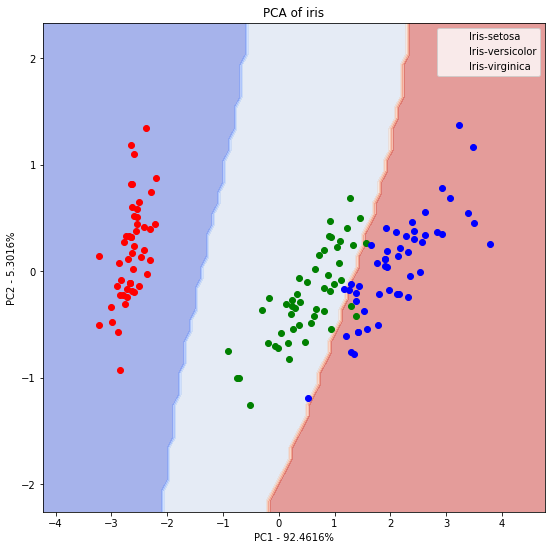

In [8]:
svm_data = iris_pca[['PC1','PC2']]
x = iris_pca.PC1
y = iris_pca.PC2
t = iris_pca.target
iris_SVM = svm.SVC(kernel='rbf', C=1)
iris_SVM = iris_SVM.fit(svm_data, t)

x_min, x_max = x.min() - 1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1), np.arange(y_min, y_max, .1))

Z = iris_SVM.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.tolist()

for i, name in enumerate(Z):
    species = {
        'Iris-setosa' : 0,
        'Iris-versicolor' : 1,
        'Iris-virginica' : 2,
    }
    Z[i] = species[name]

Z = np.array(Z).reshape(xx.shape)

plt.figure(figsize=(9,9))

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color = ['r','g','b']

for target, color in zip(species,color):
    spec = iris_pca.target == target
    plt.scatter(iris_pca.loc[spec, 'PC1'], iris_pca.loc[spec, 'PC2'], c = color)

plt.legend(species)     
plt.xlabel('PC1 - ' + str(pca_vari[0]) + '%')
plt.ylabel('PC2 - ' + str(pca_vari[1]) + '%')
plt.title('PCA of iris')
